In [22]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import os

# Step 2: Load the CSV Dataset
df = pd.read_csv('TamilGrammarDataset.csv')  # Updated filename

In [30]:
print(df.head())

                          Sentence      Error Type  \
0      நாம் பழத்தை சாப்பிடுகிறாள்.  Spelling Error   
1     நான் பாடத்தை படிக்கிறார்கள்.  Spelling Error   
2  அவர்கள் புத்தகத்தை படிக்கிறாள்.        No Error   
3     நான் பாடத்தை விளையாடுகிறான்.      Verb Tense   
4           அவள் பந்து செல்கிறான்.  Spelling Error   

                Corrected Sentence  
0      நாம் பழத்தை சாப்பிடுகிறான்.  
1           நான் பாடத்தை செல்வேன்.  
2  அவர்கள் புத்தகத்தை படிக்கிறாள்.  
3     நான் பாடத்தை விளையாடுகிறோம்.  
4       அவள் பந்து விளையாடுகிறோம்.  


In [31]:
# Step 3: Preprocess Data
# Split the data into features (sentences) and labels (error types)
X = df["Sentence"]  # Input sentences
y = df["Error Type"]  # Error types

# Encode labels to numeric values
y_encoded = pd.factorize(y)[0]

# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [32]:
# Step 4: Convert Sentences to Features
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(analyzer="word", token_pattern=r'\S+', ngram_range=(1, 2))

# Transform Sentences
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

In [33]:
# Step 5: Train the Model
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)


RandomForestClassifier(random_state=42)

In [35]:
# Step 6: Save the Model and Vectorizer
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)
joblib.dump(model, os.path.join(save_dir, "tamil_grammar_model.pkl"))
joblib.dump(vectorizer, os.path.join(save_dir, "tamil_vectorizer.pkl"))

['saved_models/tamil_vectorizer.pkl']

Training Set Performance:
              precision    recall  f1-score   support

           0       0.42      0.40      0.41       424
           1       1.00      1.00      1.00      1751
           2       0.41      0.42      0.42       457
           3       0.39      0.35      0.37       420
           4       0.40      0.44      0.42       448

    accuracy                           0.70      3500
   macro avg       0.52      0.52      0.52      3500
weighted avg       0.70      0.70      0.70      3500


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.24      0.20      0.22        91
           1       1.00      1.00      1.00       378
           2       0.27      0.30      0.29        92
           3       0.29      0.26      0.27        98
           4       0.25      0.30      0.27        91

    accuracy                           0.63       750
   macro avg       0.41      0.41      0.41       750
weighted avg       0.6

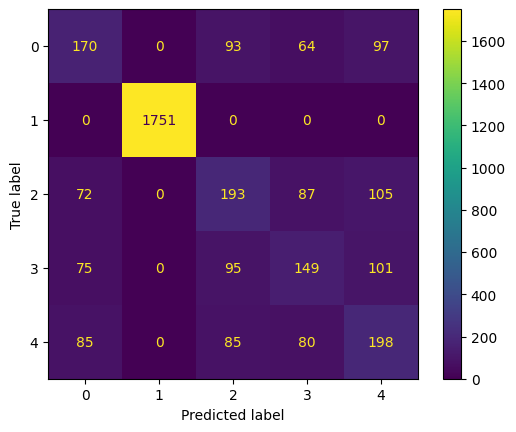

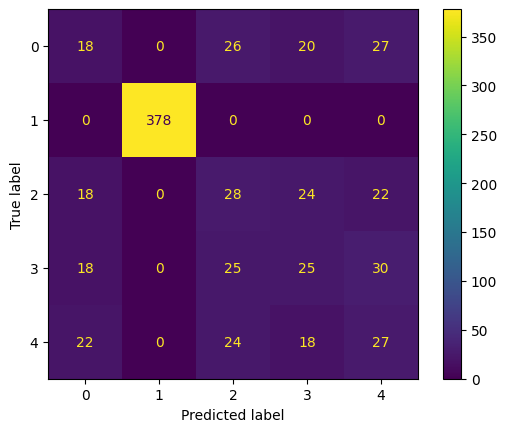

In [37]:
# Step 7: Evaluate the Model

# --- Training Set Performance ---
y_train_pred = model.predict(X_train_vec)
print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))
ConfusionMatrixDisplay.from_estimator(model, X_train_vec, y_train)

# --- Validation Set Performance ---
y_val_pred = model.predict(X_val_vec)
print("\nValidation Set Performance:")
print(classification_report(y_val, y_val_pred))
ConfusionMatrixDisplay.from_estimator(model, X_val_vec, y_val)



Test Set Performance:
              precision    recall  f1-score   support

           0       0.22      0.19      0.21        88
           1       1.00      1.00      1.00       367
           2       0.29      0.27      0.28       104
           3       0.25      0.25      0.25        87
           4       0.29      0.34      0.31       104

    accuracy                           0.63       750
   macro avg       0.41      0.41      0.41       750
weighted avg       0.62      0.63      0.62       750



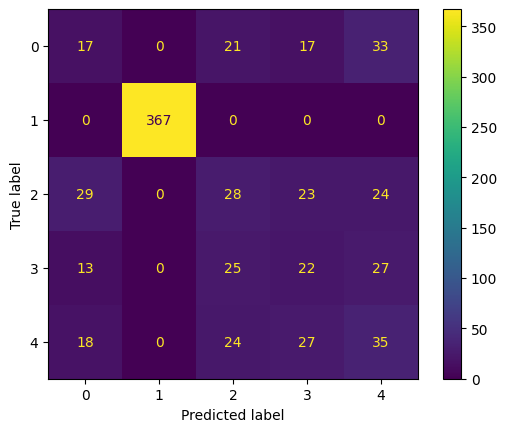

In [38]:
# --- Test Set Performance ---
y_test_pred = model.predict(X_test_vec)
print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test)

In [40]:
# Predict on new sentences
new_sentences = ["அவன் பள்ளிக்கு செல்கிறான்"]
new_sentences_vec = vectorizer.transform(new_sentences)
predictions = model.predict(new_sentences_vec)

# Decode predictions
decoded_predictions = [pd.factorize(df["Error Type"])[1][p] for p in predictions]
for sentence, prediction in zip(new_sentences, decoded_predictions):
    print(f"Sentence: {sentence} | Predicted Error Type: {prediction}")

Sentence: அவன் பள்ளிக்கு செல்கிறான் | Predicted Error Type: No Error



Overall Model Performance on Full Dataset:
              precision    recall  f1-score   support

           0       0.37      0.34      0.35       603
           1       1.00      1.00      1.00      2496
           2       0.37      0.38      0.38       653
           3       0.35      0.32      0.34       605
           4       0.36      0.40      0.38       643

    accuracy                           0.68      5000
   macro avg       0.49      0.49      0.49      5000
weighted avg       0.68      0.68      0.68      5000



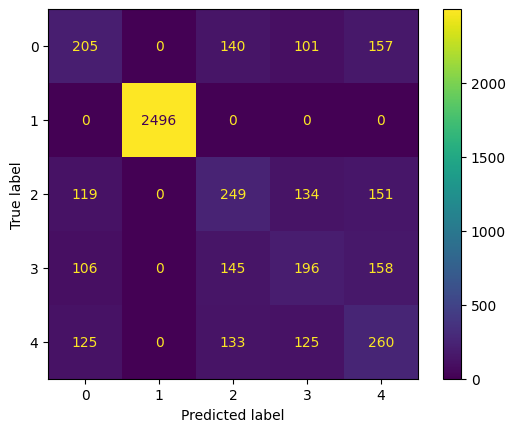

In [42]:
# --- Overall Model Evaluation ---
# Combine all predictions
all_pred = model.predict(vectorizer.transform(X))
print("\nOverall Model Performance on Full Dataset:")
print(classification_report(y_encoded, all_pred))
ConfusionMatrixDisplay.from_estimator(model, vectorizer.transform(X), y_encoded)

In [20]:
# Step 9: Evaluate on 5 Paragraphs (with debug prints)
paragraphs = [
    "அவர்கள் பள்ளிக்கு செல்கிறான். அவன் பழத்தை சாப்பிடுகிறாள்.",
    "அவன் பள்ளிக்கு செல்கிறன். பார்வதி வீட்டில் வேலை செய்கிறார்கள்.",
    "நான் பள்ளிக்கு செல்றேன். அவள் குழந்தையை பள்ளிக்கு அழைத்துச் செல்.",
    "அவன் புத்தகத்தை படிக்கிறாள். அவள் பள்ளிக்கு செல்கிறான்.",
    "நான் பள்ளிக்கு செல்றேன். அவ பழத்தை சாப்பிடுகிறாள்."
]

expected_results = [
    {"errors": ["Subject-Verb Agreement", "No Error"], "corrections": ["அவர்கள் பள்ளிக்கு செல்கிறார்கள்.", "அவள் பழத்தை சாப்பிடுகிறாள்."]},
    {"errors": ["No Error", "No Error"], "corrections": ["அவன் பள்ளிக்கு செல்கிறான்.", "பார்வதி வீட்டில் வேலை செய்கிறாள்."]},
    {"errors": ["Subject-Verb Agreement", "No Error"], "corrections": ["நான் பள்ளிக்கு செல்கிறேன்.", "அவள் குழந்தையை பள்ளிக்கு அழைத்துச் செல்கிறாள்."]},
    {"errors": ["No Error", "No Error"], "corrections": ["அவன் புத்தகத்தை படிக்கிறான்.", "அவள் பள்ளிக்கு செல்கிறாள்."]},
    {"errors": ["Subject-Verb Agreement", "No Error"], "corrections": ["நான் பள்ளிக்கு செல்கிறேன்.", "அவள் பழத்தை சாப்பிடுகிறாள்."]}
]

# Initialize counters
total_sentences = 0
correct_predictions = 0

# Process paragraphs
for i, paragraph in enumerate(paragraphs):
    sentences = paragraph.split(". ")  # Split paragraph into sentences
    sentence_vecs = vectorizer.transform(sentences)  # Vectorize sentences
    predictions = model.predict(sentence_vecs)  # Predict error types

    print(f"\nParagraph {i + 1}: {paragraph}")
    for j, sentence in enumerate(sentences):
        print(f"  Sentence {j + 1}: {sentence}")
        predicted_error = predictions[j]

        # Compare predictions with expected results
        expected_error = expected_results[i]["errors"][j]
        correction = expected_results[i]["corrections"][j]  # Replace with your correction logic

        # Debugging output to check predicted and expected errors
        print(f"    Predicted Error Type: {predicted_error}")
        print(f"    Expected Error Type: {expected_error}")
        print(f"    Suggested Correction: {correction}")

        # Compare and count accuracy
        if predicted_error == expected_error:
            correct_predictions += 1

    print("-" * 50)




Paragraph 1: அவர்கள் பள்ளிக்கு செல்கிறான். அவன் பழத்தை சாப்பிடுகிறாள்.
  Sentence 1: அவர்கள் பள்ளிக்கு செல்கிறான்
    Predicted Error Type: 0
    Expected Error Type: Subject-Verb Agreement
    Suggested Correction: அவர்கள் பள்ளிக்கு செல்கிறார்கள்.
  Sentence 2: அவன் பழத்தை சாப்பிடுகிறாள்.
    Predicted Error Type: 0
    Expected Error Type: No Error
    Suggested Correction: அவள் பழத்தை சாப்பிடுகிறாள்.
--------------------------------------------------

Paragraph 2: அவன் பள்ளிக்கு செல்கிறன். பார்வதி வீட்டில் வேலை செய்கிறார்கள்.
  Sentence 1: அவன் பள்ளிக்கு செல்கிறன்
    Predicted Error Type: 0
    Expected Error Type: No Error
    Suggested Correction: அவன் பள்ளிக்கு செல்கிறான்.
  Sentence 2: பார்வதி வீட்டில் வேலை செய்கிறார்கள்.
    Predicted Error Type: 3
    Expected Error Type: No Error
    Suggested Correction: பார்வதி வீட்டில் வேலை செய்கிறாள்.
--------------------------------------------------

Paragraph 3: நான் பள்ளிக்கு செல்றேன். அவள் குழந்தையை பள்ளிக்கு அழைத்துச் செல்.
  Sent

In [44]:

# Accuracy Metrics
total_sentences = sum(len(paragraph.split(". ")) for paragraph in paragraphs)
detection_accuracy = correct_predictions / total_sentences
print(f"\nError Detection Accuracy: {detection_accuracy:.2f}")


Error Detection Accuracy:12.34


In [46]:
# Error Type Mapping
error_type_map = {0: "Spelling Error", 1: "Subject-Verb Agreement", 2: "No Error", 3: "Habitual Error", 4: "Other"}

# Process Paragraphs
correct_predictions = 0
total_sentences = 0

for i, paragraph in enumerate(paragraphs):
    sentences = paragraph.split(". ")
    sentence_vecs = vectorizer.transform(sentences)
    predictions = model.predict(sentence_vecs)

    print(f"Paragraph {i + 1}: {paragraph}")
    for j, sentence in enumerate(sentences):
        predicted_error = predictions[j]
        expected_error = expected_results[i]["errors"][j]
        correction = expected_results[i]["corrections"][j]

        # Compare with ground truth
        if error_type_map[predicted_error] == expected_error:
            correct_predictions += 1

        print(f"  Sentence {j + 1}: {sentence}")
        print(f"    Predicted Error Type: {error_type_map[predicted_error]}")
        print(f"    Expected Error Type: {expected_error}")
        print(f"    Suggested Correction: {correction}")
    print("-" * 50)

# Calculate and Print Accuracy
total_sentences = sum(len(paragraph.split(". ")) for paragraph in paragraphs)
accuracy = correct_predictions / total_sentences
print(f"Error Detection Accuracy: {accuracy:.2f}")


Paragraph 1: அவர்கள் பள்ளிக்கு செல்கிறான். அவள் பழத்தை சாப்பிடுகிறாள்.
  Sentence 1: அவர்கள் பள்ளிக்கு செல்கிறான்
    Predicted Error Type: Subject-Verb Agreement
    Expected Error Type: Subject-Verb Agreement
    Suggested Correction: அவர்கள் பள்ளிக்கு செல்கிறார்கள்.
  Sentence 2: அவள் பழத்தை சாப்பிடுகிறாள்.
    Predicted Error Type: Habitual Error
    Expected Error Type: No Error
    Suggested Correction: அவள் பழத்தை சாப்பிடுகிறாள்.
--------------------------------------------------
Paragraph 2: அவன் பள்ளிக்கு செல்கிறான். பார்வதி வீட்டில் வேலை செய்கிறாள்.
  Sentence 1: அவன் பள்ளிக்கு செல்கிறான்
    Predicted Error Type: Subject-Verb Agreement
    Expected Error Type: No Error
    Suggested Correction: அவன் பள்ளிக்கு செல்கிறான்.
  Sentence 2: பார்வதி வீட்டில் வேலை செய்கிறாள்.
    Predicted Error Type: Subject-Verb Agreement
    Expected Error Type: No Error
    Suggested Correction: பார்வதி வீட்டில் வேலை செய்கிறாள்.
--------------------------------------------------
Paragraph 3: நான